# import

In [1]:
import pandas as pd
import numpy as np
import os, sys
from keras import models
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from keras.preprocessing.image import ImageDataGenerator

sys.path.insert(0, os.getcwd())
print(sys.path)
from models import reports_gen_view as reports 

2025-02-21 12:51:19.324946: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2025-02-21 12:51:19.324972: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2025-02-21 12:51:19.325809: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-02-21 12:51:19.330481: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-02-21 12:51:19.895609: W tensorflow/compiler/tf2

['/media/jczars/4C22F02A22F01B22/Pollen-Classification-CBAM', '/home/jczars/anaconda3/envs/tf/lib/python310.zip', '/home/jczars/anaconda3/envs/tf/lib/python3.10', '/home/jczars/anaconda3/envs/tf/lib/python3.10/lib-dynload', '', '/home/jczars/.local/lib/python3.10/site-packages', '/home/jczars/anaconda3/envs/tf/lib/python3.10/site-packages', '/home/jczars/anaconda3/envs/tf/lib/python3.10/site-packages/setuptools/_vendor']


# params

In [2]:
params = {
    'path_model':"/media/jczars/4C22F02A22F01B22/Pollen-Classification-CBAM/results/phase1/AT_densenet+cbam_exp/0_DenseNet201/0_DenseNet201_bestLoss_1.keras",
    'path_src':"/media/jczars/4C22F02A22F01B22/$WinREAgent/Pollen_classification_view/BD/CPD1_Cr_Rs_400/Test/k1",
    'path_test_EQUATORIAL':"/media/jczars/4C22F02A22F01B22/Pollen-Classification-CBAM/BD/CPD1_TEST_190225/k1/EQUATORIAL",
    'path_test_POLAR':"/media/jczars/4C22F02A22F01B22/Pollen-Classification-CBAM/BD/CPD1_TEST_190225/k1/POLAR",
    }

# categories

In [3]:

cat_model = sorted(os.listdir(params['path_src']))
print(cat_model) 
print(len(cat_model))

['asphodelus', 'calicotome', 'castanea', 'ceratonia', 'ebenus', 'erica', 'eucalyptus', 'ferula', 'myrtus', 'olea', 'origanum', 'oxalis', 'pinus', 'pistacia', 'salvia', 'satureja', 'sinapis', 'thymbra', 'urginea', 'vitis']
20


In [4]:
cat_test_eq = sorted(os.listdir(params['path_test_EQUATORIAL']))
print(cat_test_eq) 
print(len(cat_test_eq))

['asphodelus', 'castanea', 'ceratonia', 'ebenus', 'erica', 'eucalyptus', 'ferula', 'olea', 'origanum', 'pistacia', 'salvia', 'satureja', 'sinapis', 'thymbra', 'urginea', 'vitis']
16


In [5]:
cat_test_pol = sorted(os.listdir(params['path_test_POLAR']))
print(cat_test_pol)
print(len(cat_test_pol))

['asphodelus', 'calicotome', 'erica', 'eucalyptus', 'ferula', 'myrtus', 'origanum', 'oxalis', 'pinus', 'salvia', 'satureja', 'thymbra', 'vitis']
13


# Load model

In [6]:
print(f"\n[INFO] load model")
model = models.load_model(params['path_model'])
model.summary()  # Print model summary


[INFO] load model


2025-02-21 12:51:21.387393: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2025-02-21 12:51:21.412871: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2025-02-21 12:51:21.413003: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 zero_padding2d (ZeroPaddin  (None, 230, 230, 3)          0         ['input_1[0][0]']             
 g2D)                                                                                             
                                                                                                  
 conv1/conv (Conv2D)         (None, 112, 112, 64)         9408      ['zero_padding2d[0][0]']      
                                                                                                  
 conv1/bn (BatchNormalizati  (None, 112, 112, 64)         256       ['conv1/conv[0][0]']      

# Equatorial view

Found 210 images belonging to 16 classes.


2025-02-21 12:56:23.173405: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:454] Loaded cuDNN version 8907


7/7 [==============================] - 4s 186ms/step
✅ Relatório salvo em: /media/jczars/4C22F02A22F01B22/Pollen-Classification-CBAM/results/phase3/class_reports_equatorial.csv
7/7 [==============================] - 1s 90ms/step
✅ Matriz de confusão salva em: /media/jczars/4C22F02A22F01B22/Pollen-Classification-CBAM/results/phase3/confusion_matrix_equatorial.png


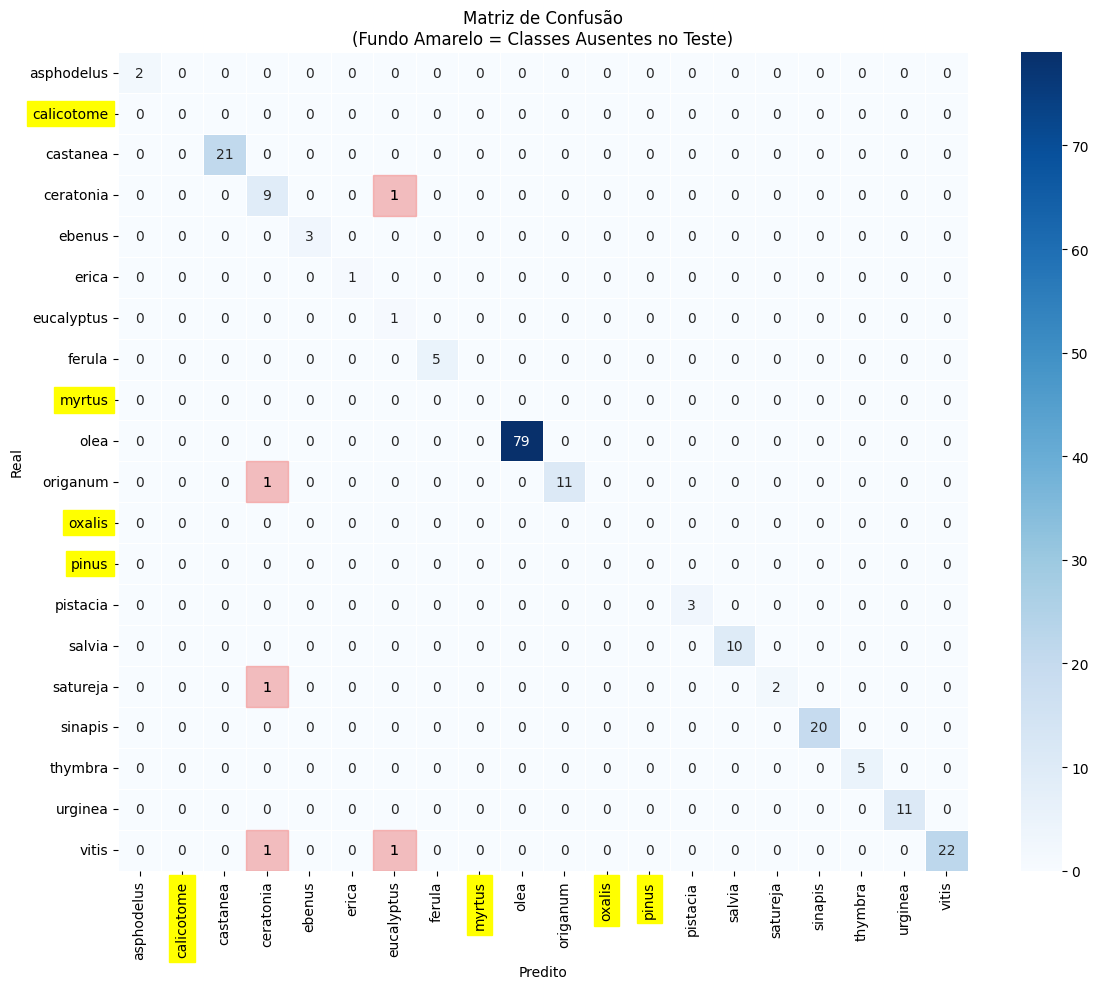

In [8]:
test_dir = params['path_test_EQUATORIAL']  # Substitua pelo caminho real
input_size = (224, 224) 
path="/media/jczars/4C22F02A22F01B22/Pollen-Classification-CBAM/results/phase3/" 
output_csv = f"{path}class_reports_equatorial.csv"
output_image= f"{path}confusion_matrix_equatorial.png" 

test_generator = reports.load_data_test_vw(test_dir, input_size)

reports.generate_classification_report_vw(model, cat_model, test_generator, output_csv)
reports.generate_confusion_matrix_vw(model, cat_model, test_generator, output_image, normalize=False)


# Polar view

Found 193 images belonging to 13 classes.
7/7 [==============================] - 1s 146ms/step
✅ Relatório salvo em: /media/jczars/4C22F02A22F01B22/Pollen-Classification-CBAM/results/phase3/class_reports_polar.csv
7/7 [==============================] - 1s 83ms/step
✅ Matriz de confusão salva em: /media/jczars/4C22F02A22F01B22/Pollen-Classification-CBAM/results/phase3/confusion_matrix_polar.png


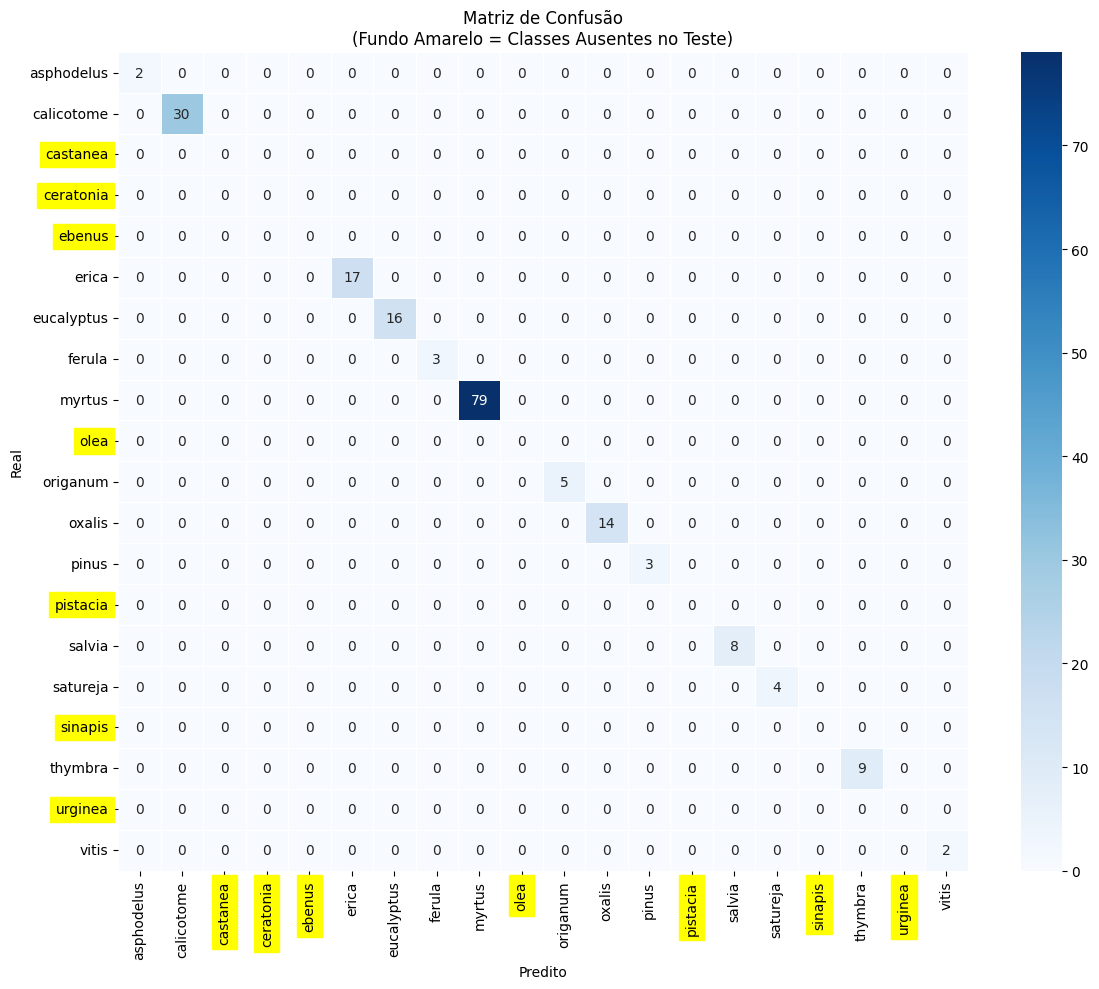

In [9]:
test_dir = params['path_test_POLAR']  # Substitua pelo caminho real
input_size = (224, 224) 
path="/media/jczars/4C22F02A22F01B22/Pollen-Classification-CBAM/results/phase3/" 
output_csv = f"{path}class_reports_polar.csv"
output_image= f"{path}confusion_matrix_polar.png" 

test_generator = reports.load_data_test_vw(test_dir, input_size)

reports.generate_classification_report_vw(model, cat_model, test_generator, output_csv)
reports.generate_confusion_matrix_vw(model, cat_model, test_generator, output_image, normalize=False)
